## Задача 1

### Загрузка и проверка данных
- Загрузите таблицу из CSV-файла
- Посмотрите, сколько всего клиентов и столбцов в таблице
- Проверьте, есть ли пустые ячейки или повторяющиеся клиенты
- Удалите ошибки, если они есть

#### Установим нужные библиотеки если вдруг они не установлены
- pip install pandas
- pip install seaborn
- pip install matplotlib

In [4]:
import pandas as pd
# Создадим датафрейм путем чтения из файла
df = pd.read_csv('Churn.csv')
#В начале работы разберемся с чем предстаит работать.
# Выведем всю информацию о названиях столбцов количества строк и типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [23]:
df.shape

(10000, 14)

**Итак, в таблице строк - 10000 ,столбцов - 14**
- float64 - 3 столбца
- int64 - 8 столбцов
- object - 3 столбца.

In [185]:
# Выведем первые 3 строки (для ознакомления с таблицей)
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [27]:
df[df.duplicated('CustomerId', keep=False)]
# Проверим есть ли дубликаты по 'CustomerId' - уникальный идентификатор клиента.
# Как видно повторяющихся 'CustomerId' нет 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [35]:
# Посмотрим количество пустых значений по столбцам
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [186]:
# Для наглядности выведем 3 последние строки где 'Tenure' NaN 
df[df['Tenure'].isnull()].tail(3)[['CustomerId','Tenure']]

,CustomerId,Tenure
9964,15642785,NaN
9985,15586914,NaN
9999,15628319,NaN


#### Пропуски в столбце 'Tenure'(время взаимодействия с банком в годах) были заполнены NaN. Предположу, что клиент с отсутствующим значением 'Tenure' является клиентом банка менее года. А значит, заменю NaN на 0.

In [5]:
df2 = df.fillna(value = 0)

In [63]:
# Выведу 3 последние строки
df2.tail(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,0.0,130142.79,1,1,0,38190.78,0


## Задача 2

### Анализ данных инструментами Python

### 2.1 Подсчитайте количество клиентов в каждой стране

In [188]:
# Сгруппируем по 'Geography' посчитаем 'CustomerId' и выведем. 
m = df2.groupby(by ='Geography')[['CustomerId']].count()
#'CustomerId' переименуем в 'Кол-во клиентов' 
m = m.rename(columns = {'CustomerId':'Кол-во клиентов'})
m

,Кол-во клиентов
Geography,
France,5014
Germany,2509
Spain,2477


**Найдите средний баланс клиентов в каждой стране**

In [91]:
# Найдем и округлим до 2х знаков после запятой
n = df2.groupby(by ='Geography')[['Balance']].mean().round(2)
n = n.rename(columns = {'Balance':'Средний баланс'})
n

,Средний баланс
Geography,
France,62092.64
Germany,119730.12
Spain,61818.15


**Вывод : Клиенты из Германии имеют средний баланс почти в 2 раза выше, чем у Франции и Испании**

### 2.2 Какие клиенты самые активные?

**Разделите клиентов на возрастные группы:** 
- молодые (18-30)
- средний возраст (31-45)
- зрелые (46-60)
- пожилые (60+)


**Посчитайте, сколько процентов активных клиентов в каждой группе**

**Молодые клиенты (18-30)**

In [189]:
# Посчитаем количество:
k = df2[(df2['Age'] >= 18) & (df2['Age'] <= 30)].shape[0]
# Посчитаем количество молодых и активных клиентов:
ka = df2[(df2['Age'] >= 18) & (df2['Age'] <= 30) & (df2['IsActiveMember'] == 1)].shape[0]
# Узнаем процент активных клиентов в группе:
itog = round((ka/k)*100,2)
itog

51.12

**Клиенты среднего возраста (31-45)**

In [191]:
# Посчитаем количество:
k = df2[(df2['Age'] >= 31) & (df2['Age'] <= 45)].shape[0]
# Посчитаем количество клиентов среднего возраста и активных:
ka = df2[(df2['Age'] >= 31) & (df2['Age'] <= 45) & (df2['IsActiveMember'] == 1)].shape[0]
# Узнаем процент активных клиентов в группе:
itog = round((ka/k)*100,2)
itog

49.15

**Зрелые клиенты (46-60)**

In [192]:
#Посчитаем количество:
k = df2[(df2['Age'] >= 46) & (df2['Age'] <= 60)].shape[0]
# Посчитаем количество зрелых и активных клиентов:
ka = df2[(df2['Age'] >= 46) & (df2['Age'] <= 60) & (df2['IsActiveMember'] == 1)].shape[0]
# Узнаем процент активных клиентов в группе:
itog = round((ka/k)*100,2)
itog

52.22

**Пожилые клиенты (60+)**

In [193]:
# Посчитаем количество:
k = df2[df2['Age'] > 60].shape[0]
# Посчитаем количество пожилых и активных клиентов:
ka = df2[(df2['Age'] > 60) & (df2['IsActiveMember'] == 1)].shape[0]
# Узнаем процент активных клиентов в группе:
itog = round((ka/k)*100,2)
itog

80.82

**Вывод : Пожилые клиенты почти в 1.6 раза активнее других возрастных групп.**
    **Для пожилых клиентов банку рекомендую:**
- Усилить программы лояльности
- Разработать специализированные продукты
- Использовать как эталонную группу для изучения факторов активности

### 2.3 Сколькими продуктами пользуются клиенты?

**Узнайте, у скольких клиентов 1, 2, 3 или 4 продукта**

In [11]:
# Сгруппируем по 'NumOfProducts' посчитаем 'CustomerId' и выведем. 
p = df2.groupby(by ='NumOfProducts')[['CustomerId']].count()
# 'CustomerId' переименуем в 'Кол-во клиентов' 
p = p.rename(columns = {'CustomerId':'Кол-во клиентов'})
p

,Кол-во клиентов
NumOfProducts,
1,5084
2,4590
3,266
4,60


**Найдите средний баланс для клиентов с разным количеством продуктов**

In [125]:
# Найдем и округлим до 2х знаков после запятой
b = df2.groupby(by ='NumOfProducts')[['Balance']].mean().round(2)
b = b.rename(columns = {'Balance':'Средний баланс'})
b

,Средний баланс
NumOfProducts,
1,98551.87
2,51879.15
3,75458.33
4,93733.14


**Вывод :**

- Клиенты с 1 продуктом имеют наибольший средний баланс - 98,551.87
- Большинство клиентов используют 1-2 продукта (96% от общей базы)

**Рекомендую банку :**
- Сфокусироваться на удержании ценных клиентов с 3-4 продуктами
- Разработать стратегию увеличения количества продуктов у клиентов с высоким балансом
- Исследовать причины резкого падения баланса у клиентов с 2 продуктами

## Задача 3

### Задача 3: Создание графиков

### 3.1 Откуда клиенты?

**Круговая диаграмма: покажите долю клиентов из каждой страны**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

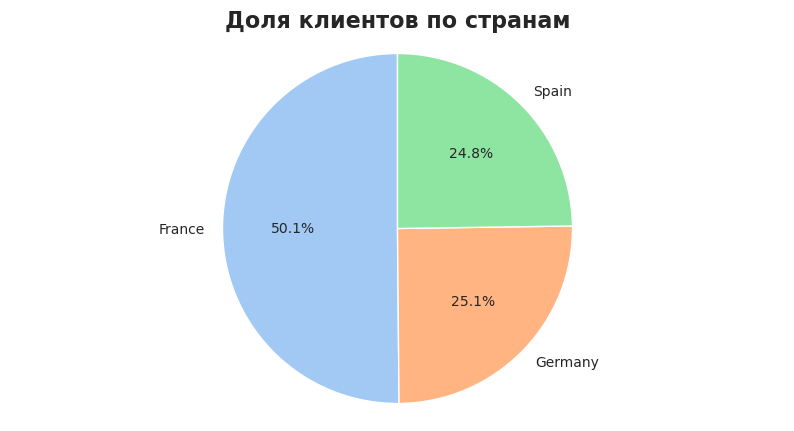

In [12]:
# Устанавливаем стиль Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
# Группируем по странам и считаем уникальных клиентов.Внимание для df2
geo = df2.groupby('Geography')['CustomerId'].nunique()
# Создаем цвета с помощью Seaborn
colors = sns.color_palette('pastel')[0:len(geo)]
# Строим круговую диаграмму
plt.pie(geo.values,labels=geo.index,autopct='%1.1f%%',colors=colors,startangle=90)
plt.title('Доля клиентов по странам', fontsize=16, fontweight='bold')
plt.axis('equal')  # Чтобы диаграмма была круглой
plt.show()

**Из диаграммы видно ,что более половины клиентов из Франции**

**Столбчатая диаграмма: покажите распределение по возрасту**

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


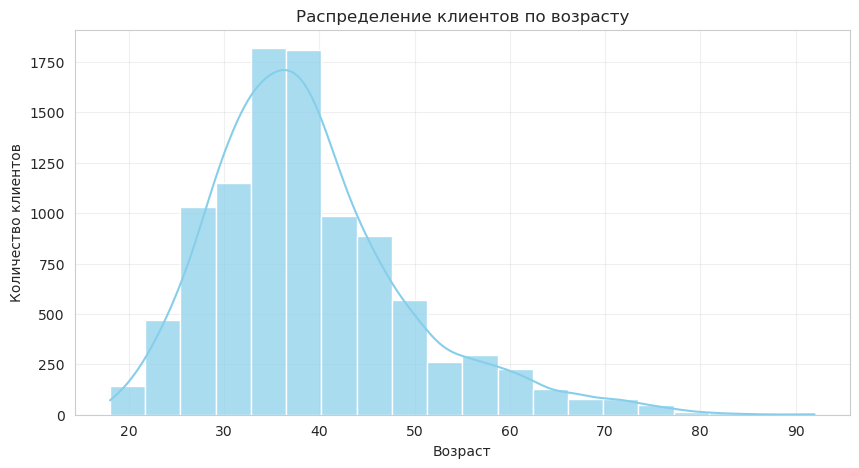

In [196]:
#Создаем новую фигуру (ширина, высота) в дюймах
plt.figure(figsize=(10, 5))
# Строим гистограмму
sns.histplot(data=df2, x='Age', bins=20, kde=True, color='skyblue', alpha=0.7)
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.grid(True, alpha=0.3)
plt.show()

Это предупреждение и означает, что в будущих версиях Seaborn изменится способ обработки бесконечных значений (inf)

**Вывод : большее число клиентов в возрасте от 30 до 45 лет**

### 3.2 Кто богаче?

**Точечный график: покажите связь между возрастом и балансом**

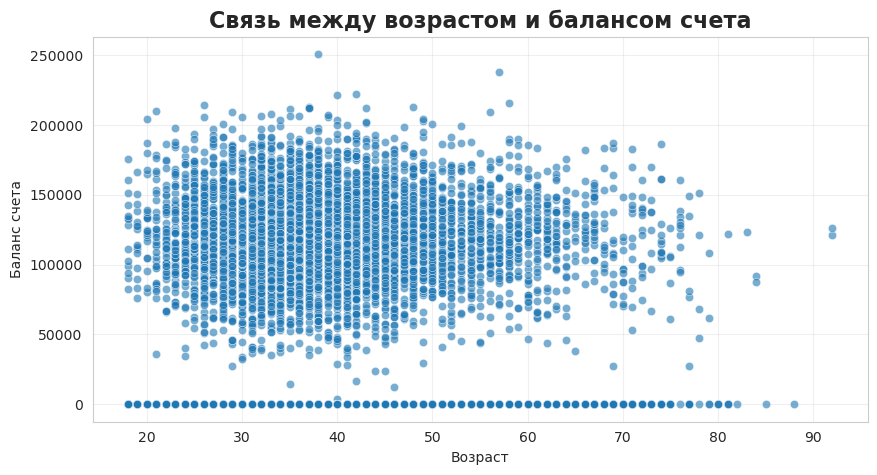

In [181]:
#Создаем новую фигуру (ширина, высота) в дюймах
plt.figure(figsize=(10, 5))
# Cтроим точечный график
sns.scatterplot(data=df2, x='Age', y='Balance', alpha=0.6)
plt.title('Связь между возрастом и балансом счета', fontsize=16, fontweight='bold')
plt.xlabel('Возраст')
plt.ylabel('Баланс счета')
plt.grid(True, alpha=0.3)
plt.show()

**Видно , что баланс счета больше у клиентов в возрасте от 30 до 45 лет**

### 3.3 Кто активнее?

**Столбчатая диаграмма: процент активных клиентов в каждой стране**

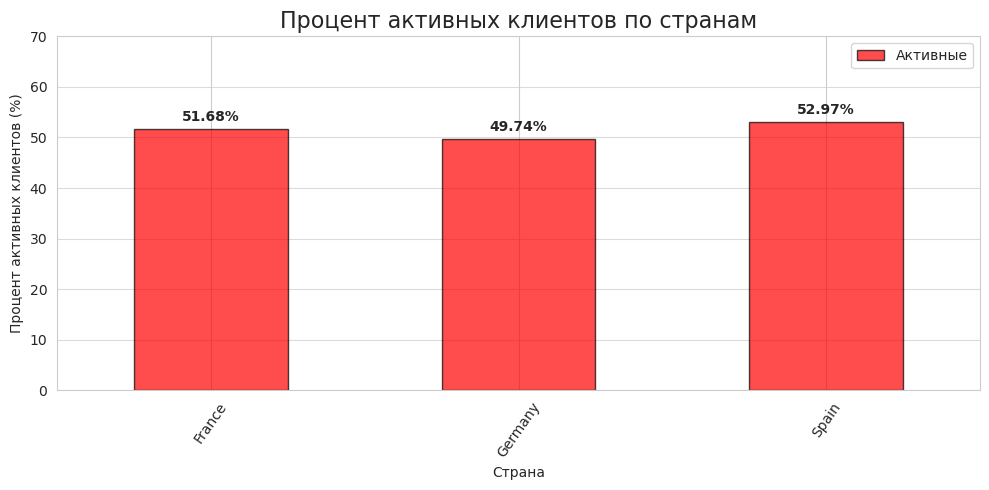

In [10]:
# Создаем данные для построения.
# value_counts(normalize=True) возвращает относительные частоты 
# (normalize=True именно проценты)
# .unstack() преобразует табличный формат, перемещая уровень индекса в заголовки столбцов
activ = df2.groupby('Geography')['IsActiveMember'].value_counts(normalize=True).unstack() * 100
# Переименовываем столбцы (на этот раз другим способом)
activ.columns = ['Неактивные', 'Активные']
#Создаем новую фигуру (ширина, высота) в дюймах
plt.figure(figsize=(10, 5))
# Выбираем только 'Активные'. kind='bar' строим столбчатую диаграмму.
# alpha=0.7 прозрачность столбцов
activ[['Активные']].plot(kind='bar', color='red', ax=plt.gca(),edgecolor='black', alpha=0.7)
plt.title('Процент активных клиентов по странам', fontsize=16)
plt.xlabel('Страна')
plt.ylabel('Процент активных клиентов (%)')
plt.xticks(rotation=55)
# Добавляем значения.plt.text добавляет текст на график:
for i, country in enumerate(activ.index):
    percentage = activ.loc[country, 'Активные']
    plt.text(i, percentage + 1, f'{percentage:.2f}%', 
             ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.7)
# Оставляем место для текста
plt.ylim(0, 70)
plt.tight_layout()
plt.show()

**Вывод : во всех трех странах наблюдается очень высокий и примерно равный уровень активности клиентов. Почти каждый второй клиент является активным.**

**Сравнительная диаграмма: средний баланс активных и неактивных клиентов**

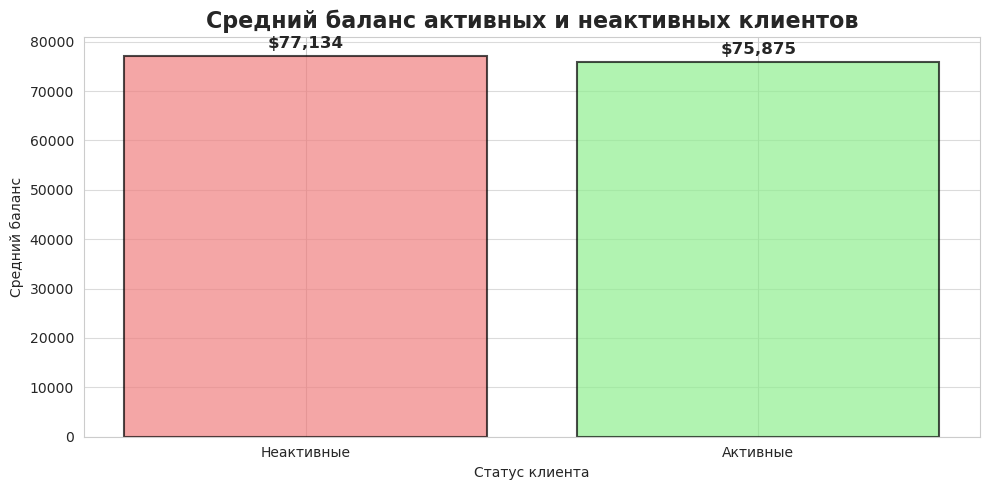

In [180]:
# Группируем данные по активности
balance = df2.groupby('IsActiveMember')['Balance'].mean().round(2)
balance.index = ['Неактивные', 'Активные']
#Создаем новую фигуру (ширина, высота) в дюймах
plt.figure(figsize=(10, 5))
# Создаем столбчатую диаграмму
bars = plt.bar(balance.index, balance,color=['lightcoral', 'lightgreen'], alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title('Средний баланс активных и неактивных клиентов', fontsize=16, fontweight='bold')
plt.xlabel('Статус клиента')
plt.ylabel('Средний баланс')
# Добавляем значения на столбцы
for bar, mean_val in zip(bars, balance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,f'${mean_val:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**Вывод : Финансовое состояние практически не влияет на активность клиента.
Для банка рекомендую ,для повышения вовлеченности клиентов следует искать другие факторы, не связанные с размером их средств на счете.**

### Задача 4

**Напишите выводы о проведенном исследовании**

Проведенный анализ данных выявил несколько ключевых закономерностей в клиентской базе банка, которые позволяют сформулировать конкретные инициативы.

- Клиенты старшего возраста являются самым лояльным и активным сегментом. Их активность на 60% выше, чем у других групп. Это ядро клиентской базы, демонстрирующее наивысшую вовлеченность.
- Клиенты в возрасте 30-45 лет не только формируют наибольшую долю в клиентской базе, но и обладают самыми высокими балансами. Это финансово активное ядро банка с высоким потенциалом долгосрочной ценности.
- Клиенты из Германии выделяются на общем фоне, имея средний баланс почти в два раза выше, чем у клиентов из Франции и Испании. Это указывает на Германию как на ключевой рынок с точки зрения концентрации капитала.
- Большинство клиентов используют 1-2 продукта.
- Уровень клиентской активности равномерно высок, что говорит об общей адекватности сервиса.
- Размер баланса не является драйвером активности. Это означает, что программы стимулирования активности должны быть основаны не на финансовых критериях, а на поведении людей и качестве взаимодействия с банком.

### Рекомендации для банка

- Разработать программу премиального обслуживания для сегмента 'Пожилые'
- Для клиентов 30-45 лет из Германии больше предлагать премиальные инвестиционные продукты, страхование, ипотечные программы.Так же предложить персонализированные пакетные предложения.
- Внедрить систему оповещений для менеджеров о клиентах с высоким балансом и которые используют только 1 продукт.Для навязывания еще больше продуктов.
- Разработать персонализированные кампании для удержания клиентов с 3-4 продуктами, так как они являются наиболее стабильной и ценной частью базы.

#### Итак, данные четко указывают на наличие значительного потенциала роста без привлечения новых клиентов.